<a id='top'></a>

# FIFA 20 and TransferMarkt Fantasy Football
### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook last updated: 23/04/2020

![title](img/fifa20banneredit.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Summary.

## Introduction
This notebook goes through a data clensing, merging and Exploratory Data Analysis (EDA) of the the EA FIFA 20 dataset merged with player values (£) from [TransferMarkt](https://www.transfermarkt.co.uk/). This workbook includes data scraping, cleaning, exploration and analysis using Python and the [pandas](http://pandas.pydata.org/) library for DataFrames, [Seaborn](https://seaborn.pydata.org/) library for visualisations, the [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library for web scraping, and the [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) library for matching two datasets.

For more information about this notebook and the author, I'm available through all the following channels:
*    [EddWebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

In [1]:
from IPython.display import Image
Image(url= "./img/ut_cards/WEBSTER.png", width=350)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-20) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/deliveroo/blob/master/FIFA%2020.ipynb).

<a id='sectioncontents'></a>

## Notebook Contents
1.    [Notebook Setup](#section1)<br>
2.    [Notebook Brief](#section2)<br>
      2.1.  [Background Information](#section2.1)<br>
      2.2.  [Exercise](#section2.2)<br>
      2.3.  [Journey Example](#section2.3)<br>
3.    [Data Sources](#section3)<br>
      3.1.  [Introduction](#section3.1)<br>
      3.2.  [FIFA 20 Database](#section3.2)<br>
            3.2.1.    [Data Dictionary](#section3.2.1)<br>
            3.2.2.    [Creating the DataFrame](#section3.2.3)<br>
            3.2.3.    [Initial Data Handling](#section3.2.3)<br>
      3.3.  [TransferMarkt Database](#section3.3)<br>
            3.3.1.    [Data Dictionary](#section3.2.1)<br>
            3.3.2.    [Creating the DataFrame](#section3.2.3)<br>
            3.3.3.    [Initial Data Handling](#section3.2.3)<br>
4.    [Data Engineering](#section4)<br>
      4.1.  [Introduction](#section4.1)<br>
      4.2.  [FIFA 20 Database](#section4.2)<br>
            4.2.1.    [Columns of Interest](#section4.2.1)<br>
            4.2.2.    [Converting Data Types](#section4.2.2)<br>
            4.2.3.    [Export the Engineered DataFrame](#section4.2.3)<br>
      4.3.  [TransferMarkt Database](#section4.3)<br>
            4.3.1.    [String Cleaning](#section4.3.1)<br>
            4.3.2.    [Converting Data Types](#section4.3.2)<br>
            4.3.3.    [Columns of Interest](#section4.3.3)<br>
            4.3.4.    [Export the Engineered DataFrame](#section4.3.4)<br>
      4.4.  [Joined Database](#section4.4)<br>
            4.4.1.    [Join the Datasets using fuzzymatcher](#section4.4.1)<br>
            4.4.2.    [Fix Bad Matches](#section4.4.2)<br>
            4.4.3.    [Reorganise the New Dataset](#section4.4.3)<br>
            4.4.4.    [Export the Joined DataFrame](#section4.4.4)<br>     
5.    [Exploratory Data Analysis](#section5)<br>
      5.1.  [Creation of New Metrics](#section5.1)<br>
      5.2.  
6.    [Summary](#section6)<br>
7.    [Bibliography](#section7)

<a id='section1'></a>

## 1. Notebook Contents

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [Jupyter notebooks](https://jupyter.org/) for this interactive computational environment that the project is presented,
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [Seaborn](https://seaborn.pydata.org/) for plotting visualisations,
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages, and
*    [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) for linking fuzzy datasets.

All packages used for this notebook except for [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

In [6]:
# All packages listed below (except for the few where otherwise stated) can be obtained by downloading and installing the Conda distribution, available on all platforms (Windows, Linux and Mac OSX) here: https://anaconda.org/anaconda/conda

# Import modules

# Python ≥3.5 (ideally)
import platform
import sys
assert sys.version_info >= (3, 5)

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np

# Data Preprocessing
import pandas as pd

# Data Scraping
import requests
from bs4 import BeautifulSoup

# Joining datasets
from pathlib import Path
import fuzzymatcher

# Date and time manipulation
from datetime import datetime

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from matplotlib.patches import Arc
import missingno as msno    # not include with Conda, 'pip install missingno' in the terminal if you don't have it

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [10]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


<a id='section2'></a>

## 2. Notebook Brief
The objective of this Jupyter notebook is to merge two data sources - FIFA 20 and [TransferMarkt](https://www.transfermarkt.co.uk/) data, to analyse and explore the statistics of all the footballers from the FIFA 20 player database by real-world transfer value, to build the most effective, best-value Fantasy Football squad possible.

<a id='section3'></a>

## 3. Data Sources

### 3.1. Introduction
The data section has been has been split into the two datasets that are to be worked on:
*   A downloaded FIFA 20 squad file for player names and ratings - `data_fifa20.csv` ([section 3.2](#section3.2)); and
*   Scraped player data from [TransferMarkt](https://www.transfermarkt.co.uk/) for real-world transfer values of players in GBP (£) ([section 3.3](#section3.3)).

These data sources are then later joined to create a single DataFrame in which analysis can then be taken place in section [section 5](#section5).

<a id='section3.2'></a>

### 3.2. FIFA 20
This FIFA 20 dataset was downloaded from [Kaggle](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset), made available by [Stefano Leone](https://www.kaggle.com/stefanoleone992). This download includes FIFA databases from years 15 to 20.

EA Sport's FIFA 20 database has [over 17,000 players from over 700 clubs, from over 30 official leagues](https://en.wikipedia.org/wiki/FIFA_20#Licenses) all across the world. Each player has recorded details including: 'Name', 'Age', 'Nationality', 'Position', 'Height' , as well as in-game ratings for attributes such as 'Acceleration', 'Stamina', 'Tackling', 'Vision'.

<a id='section3.2.1'></a>

#### 3.2.1. Data Dictionaries
The FIFA 20 dataset has one hundered and four features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `sofifa_id`    | int64     |
| `player_url`    | object     |
| `short_name`    | object     |
| `long_name`    | object     |
| `age`    | int64     |
| `dob`    | object     |
| `height_cm`    | int64     |
| `weight_kg`    | int64     |
| `nationality`    | object     |
| `club`    | object     |
| `overall`    | int64     |
| `potential`    | int64     |
| `value_eur`    | int64     |
| `wage_eur`    | int64     |
| `player_positions`    | object     |
| `preferred_foot`    | object     |
| `international_reputation`    | int64     |
| `weak_foot`    | int64     |
| `skill_moves`    | int64     |
| `work_rate`    | object     |
| `body_type`    | object     |
| `real_face`    | object     |
| `release_clause_eur`    | float64     |
| `player_tags`    | object     |
| `team_position`    | object     |
| `team_jersey_number`    | float64     |
| `loaned_from`    | object     |
| `joined`    | object     |
| `contract_valid_until`    | float64     |
| `nation_position`    | object     |
| `nation_jersey_number`    | float64     |
| `pace`    | float64     |
| `shooting`    | float64     |
| `passing`    | float64     |
| `dribbling`    | float64     |
| `defending`    | float64     |
| `physic`    | float64     |
| `gk_diving`    | float64     |
| `gk_handling`    | float64     |
| `gk_kicking`    | float64     |
| `gk_reflexes`    | float64     |
| `gk_speed`    | float64     |
| `gk_positioning`    | float64     |
| `player_traits`    | object     |
| `attacking_crossing`    | int64     |
| `attacking_finishing`    | int64     |
| `attacking_heading_accuracy`    | int64     |
| `attacking_short_passing`    | int64     |
| `attacking_volleys`    | int64     |
| `skill_dribbling`    | int64     |
| `skill_curve`    | int64     |
| `skill_fk_accuracy`    | int64     |
| `skill_long_passing`    | int64     |
| `skill_ball_control`    | int64     |
| `movement_acceleration`    | int64     |
| `movement_sprint_speed`    | int64     |
| `movement_agility`    | int64     |
| `movement_reactions`    | int64     |
| `movement_balance`    | int64     |
| `power_shot_power`    | int64     |
| `power_jumping`    | int64     |
| `power_stamina`    | int64     |
| `power_strength`    | int64     |
| `power_long_shots`    | int64     |
| `mentality_aggression`    | int64     |
| `mentality_interceptions`    | int64     |
| `mentality_positioning`    | int64     |
| `mentality_vision`    | int64     |
| `mentality_penalties`    | int64     |
| `mentality_composure`    | int64     |
| `defending_marking`    | int64     |
| `defending_standing_tackle`    | int64     |
| `defending_sliding_tackle`    | int64     |
| `goalkeeping_diving`    | int64     |
| `goalkeeping_handling`    | int64     |
| `goalkeeping_kicking`    | int64     |
| `goalkeeping_positioning`    | int64     |
| `goalkeeping_reflexes`    | int64     |
| `ls`    | object     |
| `st`    | object     |
| `rs`    | object     |
| `lw`    | object     |
| `lf`    | object     |
| `cf`    | object     |
| `rf`    | object     |
| `rw`    | object     |
| `lam`    | object     |
| `cam`    | object     |
| `ram`    | object     |
| `lm`    | object     |
| `lcm`    | object     |
| `cm`    | object     |
| `rcm`    | object     |
| `rm`    | object     |
| `lwb`    | object     |
| `ldm`    | object     |
| `cdm`    | object     |
| `rdm`    | object     |
| `rwb`    | object     |
| `lb`    | object     |
| `lcb`    | object     |
| `cb`    | object     |
| `rcb`    | object     |
| `rb`    | object     |

It should be stated that the FIFA20 database does include values on players `value_eur`. However, those that have played the game will know that these are inaccurate to those real-world values and for these reason, we will be sourcing much more accurate player values from [TransferMarkt](https://www.transfermarkt.co.uk/) in [section 3.3](#section3.3).

<a id='section3.2.2'></a>

#### 3.2.2. Creating the DataFrame

In [11]:
# Set up initial path to data
dataDir = r'data/'

In [12]:
# Import data as a DataFrame called 'df_original'. To use in wrangling process before creating 'df' DataFrame for analysis
file_fifa20 = "data_fifa20.csv"
filepath_fifa20 = dataDir + file_fifa20
df_fifa_raw = pd.read_csv(filepath_fifa20)

<a id='section3.2.3'></a>

#### 3.2.3. Initial Data Handling
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [14]:
# Display the first 5 rows of the raw DataFrame, df_fifa_raw
df_fifa_raw.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [15]:
# Display the last 5 rows of the raw DataFrame, df_fifa_raw
df_fifa_raw.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [16]:
# Print the shape of the raw DataFrame, df_fifa_raw
print(df_fifa_raw.shape)

(18278, 104)


The raw DataFrame has:
*    18,278 observations (rows), each observation represents one unique player, and
*    104 attributes (columns).

[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [9]:
df_fifa_raw.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

The dataset has one hundred and four features (columns):
*    `sofifa_id`
*    `player_url`
*    `short_name`
*    `long_name`
*    `age`
*    `dob`
*    `height_cm`
*    `weight_kg`
*    `nationality`
*    `club`
*    `overall`
*    `potential`
*    `value_eur`
*    `wage_eur`
*    `player_positions`
*    `preferred_foot`
*    `international_reputation`
*    `weak_foot`
*    `skill_moves`
*    `work_rate`
*    `body_type`
*    `real_face`
*    `release_clause_eur`
*    `player_tags`
*    `team_position`
*    `team_jersey_number`
*    `loaned_from`
*    `joined`
*    `contract_valid_until`
*    `nation_position`
*    `nation_jersey_number`
*    `pace`
*    `shooting`
*    `passing`
*    `dribbling`
*    `defending`
*    `physic`
*    `gk_diving`
*    `gk_handling`
*    `gk_kicking`
*    `gk_reflexes`
*    `gk_speed`
*    `gk_positioning`
*    `player_traits`
*    `attacking_crossing`
*    `attacking_finishing`
*    `attacking_heading_accuracy`
*    `attacking_short_passing`
*    `attacking_volleys`
*    `skill_dribbling`
*    `skill_curve`
*    `skill_fk_accuracy`
*    `skill_long_passing`
*    `skill_ball_control`
*    `movement_acceleration`
*    `movement_sprint_speed`
*    `movement_agility`
*    `movement_reactions`
*    `movement_balance`
*    `power_shot_power`
*    `power_jumping`
*    `power_stamina`
*    `power_strength`
*    `power_long_shots`
*    `mentality_aggression`
*    `mentality_interceptions`
*    `mentality_positioning`
*    `mentality_vision`
*    `mentality_penalties`
*    `mentality_composure`
*    `defending_marking`
*    `defending_standing_tackle`
*    `defending_sliding_tackle`
*    `goalkeeping_diving`
*    `goalkeeping_handling`
*    `goalkeeping_kicking`
*    `goalkeeping_positioning`
*    `goalkeeping_reflexes`
*    `ls`
*    `st`
*    `rs`
*    `lw`
*    `lf`
*    `cf`
*    `rf`
*    `rw`
*    `lam`
*    `cam`
*    `ram`
*    `lm`
*    `lcm`
*    `cm`
*    `rcm`
*    `rm`
*    `lwb`
*    `ldm`
*    `cdm`
*    `rdm`
*    `rwb`
*    `lb`
*    `lcb`
*    `cb`
*    `rcb`
*    `rb`

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [17]:
# dtypes of the features of the raw DataFrame, df_fifa_raw

# df_fifa_raw.dtypes    # too many columns for this code

# Displays all one hundered and four columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fifa_raw .dtypes)

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [18]:
# Info for the raw DataFrame, df_fifa_raw
df_fifa_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [19]:
# Description of the raw DataFrame, df_fifa_raw, showing some summary statistics for each numberical column in the DataFrame
df_fifa_raw.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


We can see from describe the count, mean, min, max and standard deviation of many player features, e.g.
*    The average player age in the database is 25 years old. The oldest play age is 16 and the oldest is 42.
*    The average height for a player in the database is 181cm (5ft9in). The shortest player is 156cm (5ft1in) and the tallest player is 205cm (6ft7in).
*    The highest rated player is 94 (Lionel Messi). The lowest rated player is 48.

Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

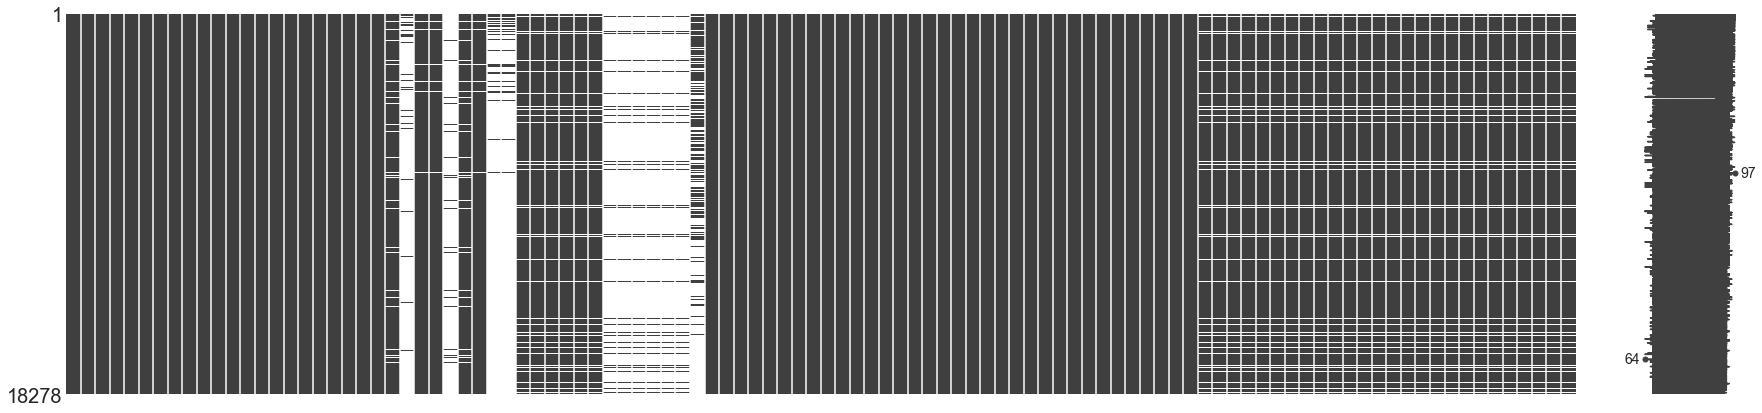

In [13]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fifa_raw
msno.matrix(df_fifa_raw, figsize = (30, 7))

In [14]:
# Counts of missing values
null_value_stats = df_fifa_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm        

The visualisation and print out shows us that that the database is made up of 16,242 outfielders and 2,036 goalkeepers. All 16,242 outfield players have null values for the goalkeeper attributes (`gk_diving`, `gk_handling`, `gk_kicking`, `gk_reflexes`, `gk_speed`, `gk_positioning`), likewise, all goalkeepers have null values for the outfield attributes (`pace`, `shooting`, `passing`, `dribbling`, `defending`, `physic`) or outfield positions (`ls`, `st`, `rs`, `lw`, `lf`, `cf`, `rf`, `rw`, `lam`, `cam`, `ram`, `lm`, `lcm`, `cm`, `rcm`, `rm`, `lwb`, `ldm`, `cdm`, `rdm`, `rwb`, `lb`, `lcb`, `cb`, `rcb`, `rb`).

We can also see that 17,152 players do not have a `nation_position` or `nation_jersey_number` i.e. they don't play for their country and 240 players don't have `team_position` or `team_jersey_number` i.e. they are free agents not signed to clubs.

This database has no missing values of interest and therefore requires no further alteration. The database will however require some engineering and manipulation, which can be found in the Data Engineering section, in [section 4](#section4).

<a id='section3.3'></a>

### 3.3. TransferMarkt
[TransferMarkt](https://www.transfermarkt.co.uk/) is a German-based website owned by [Axel Springer](https://www.axelspringer.com/en/) and is the leading website on the football transfer market. The website posts football related data, including: scores and results, football news, transfer rumours, and most usefully for us - calculated estimates of market values of teams and individual players.

To read more about how these estimations are made, [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann does an excellent job of explaining how the estimations are made and their level of accuracy.

<a id='section3.3.1'></a>

#### 3.3.1. Data Dictionaries
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `position_number`    | object     |
| `position_description`    | object     |
| `name`    | object     |
| `dob`    | object     |
| `nationality`    | object     |
| `value`    | object     |

#### 3.3.2. Scrape TransferMarkt
Before scraping data from [TransferMarkt](https://www.transfermarkt.co.uk/), we need to look at the leagues that are licensed and available in FIFA 20. In total, there over [30 official leagues, over 700 clubs and over 17,000 players](https://en.wikipedia.org/wiki/FIFA_20#Licenses). 

The web scraper for [TransferMarkt](https://www.transfermarkt.co.uk/) is made up of two parts:
1.    In the first part, the scraper takes the webpages for each of the individual leagues  e.g. The Premier League, and extract the webpage links for all the individual teams in the league table.
2.    In the second part the script, the webscraper uses the list of invidual teams collected in part 1 to extract information for each of the individual players for each team.

This information collected for all the players is then joined together and a pandas DataFrame is created.

An example webpage for a football league is the following: https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/GB1/plus/?saison_id=2019. As we can see, between the subdirectory path of '/wettbewerb/' and the '/plus/', there is a 3 or 4 digit code. For The Premier League, the code is GB1. 

In order to scrape the webpages from [TransferMarkt](https://www.transfermarkt.co.uk/), the codes of the leagues in FIFA need to be recorded from [TransferMarkt](https://www.transfermarkt.co.uk/), which are the following:

| League Name on FIFA    | Country    | Corresponding [TransferMarkt](https://www.transfermarkt.co.uk/) League Code    |
|------|-----|-----|
| Österreichische Fußball-Bundesliga    | Austria    | A1    |
| SAF    | Argentina    | AR1N    |
| Hyundai A-League    | Australia    | AUS1    |
| Belgium Pro League    | Belgium    | BE1    |
| Raiffeisen Super League    | Switzerland    | C1    |
| Campeonato Scotiabank    | Chile    | CLPD    |
| Liga Dimayor    | Colombia    | COL1    |
| CSL    | China    | CSL    |
| Superliga    | Denmark    | DK1    |
| LaLiga Santander    | Spain    | ES1    |
| LaLiga 1 I 2 I 3    | Spain    | ES2    |
| Finnliiga    | Finland    | FI1    |
| Ligue 1 Conforama    | France    | FR1    |
| Domino’s Ligue 2    | France    | FR2    |
| Premier League    | England    | GB1    |
| EFL Championship    | England    | GB2    |
| EFL League One    | England    | GB3    |
| EFL League Two    | England    | GB4    |
| Hellas Liga    | Greece    | GR1    |
| SSE Airtricity League    | Ireland    | IR1    |
| Serie A TIM    | Italy    | IT1    |
| Calcio B    | Italy    | IT2    |
| Meiji Yasuda J1 League    | Japan    | JAP1    |
| Croatia Liga    | Croatia    | KR1    |
| Bundesliga    | Germany    | L1    |
| Bundesliga 2    | Germany    | L2    |
| 3. Liga    | Germany    | L3    |
| LIGA Bancomer MX    | Mexico    | MEX1    |
| Major League Soccer    | United States    | MLS1    |
| Eredivisie    | Netherlands    | NL1    |
| Eliteserien    | Norway    | NO1    |
| Ekstraklasa    | Poland    | PL1    |
| Liga NOS    | Portugal    | PO1    |
| Romania Liga I    | Romania    | RO1    |
| K LEAGUE Classic    | South Korea    | RSK1    |
| League of Russia    | Russia    | RU1    |
| Saudi Professional    | League	Saudi Arabia    | SA1    |
| Scottish Premiership    | Scotland    | SC1    |
| Allsvenskan    | Sweden    | SE1    |
| South African FL    | South Africa    | SFA1    |
| Süper Lig    | Turkey    | TR1    |
| Česká Liga    | Czech Republic    | TS1    |
| UAE Gulf League    | United Arab Emirates    | UAE1    |
| Ukraine Liga    | Ukraine    | UKR1    |



Unfortunately, on writing this notebook, the following leagues are that is present on FIFA but cannot scraped from [TransferMarkt](https://www.transfermarkt.co.uk/) with the script and will and therefore not be included in the dataset.

| League Name on FIFA    | Country    | Corresponding [TransferMarkt](https://www.transfermarkt.co.uk/) League Code    |
|------|-----|-----|
| League of Russia    | Russia    | RU1    |

In [20]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:75.0) Gecko/20100101 Firefox/75.0'
}

In [21]:
# List of leagues by code
# leagues_all = ['A1', 'AR1N', 'AUS1', 'BE1', 'C1', 'CLPD', 'COL1', 'CSL', 'DK1', 'ES1', 'ES2', 'FI1', 'FR1', 'FR2', 'GB1', 'GB2', 'GB3', 'GB4', 'GR1', 'IR1', 'IT1', 'IT2', 'JAP1', 'KR1', 'L1', 'L2', 'L3', 'MEXA', 'MLS1', 'NL1', 'NO1', 'PL1', 'PO1', 'RO1', 'RSK1', 'RU1', 'SA1', 'SC1', 'SE1', 'SFA1', 'TR1', 'TS1', 'UAE1', 'UKR1']
leagues = ['A1', 'AR1N', 'AUS1', 'BE1', 'C1', 'CLPD', 'COL1', 'CSL', 'DK1', 'ES1', 'ES2', 'FI1', 'FR1', 'FR2', 'GB1', 'GB2', 'GB3', 'GB4', 'GR1', 'IR1', 'IT1', 'IT2', 'JAP1', 'KR1', 'L1', 'L2', 'L3', 'MEX1', 'MLS1', 'NL1', 'NO1', 'PL1', 'PO1', 'RO1', 'RSK1', 'SA1', 'SC1', 'SE1', 'SFA1', 'TR1', 'TS1', 'UAE1', 'UKR1']

# Leagues that break the code
# leagues_broken = ['RU1']

In [22]:
# Assign season by year to season variable e.g. 2014/15 season = 2014
season = '2019'

In [18]:
'''
# Uncomment this code to scrape latest version of this data. Commented out to avoid needless repetition

def main(url):
    with requests.Session() as req:
        links = []
        for lea in leagues:
            print(f"Fetching Links from {lea}")
            r = req.get(url.format(lea), headers=headers)
            soup = BeautifulSoup(r.content, 'html.parser')
            link = [f"{url[:31]}{item.next_element.get('href')}" for item in soup.findAll(
                "td", class_="hauptlink no-border-links hide-for-small hide-for-pad")]
            links.extend(link)

        print(f"Collected {len(links)} Links")
        goals = []
        for num, link in enumerate(links):
            print(f"Extracting Page# {num +1}")
            r = req.get(link, headers=headers)
            soup = BeautifulSoup(r.content, 'html.parser')
            target = soup.find("table", class_="items")
            pn = [pn.text for pn in target.select("div.rn_nummer")]
            pos = [pos.text for pos in target.findAll("td", class_=False)]
            name = [name.text for name in target.select("td.hide")]
            dob = [date.find_next(
                "td").text for date in target.select("td.hide")]
            nat = [" / ".join([a.get("alt") for a in nat.find_all_next("td")[1] if a.get("alt")]) for nat in target.findAll(
                "td", itemprop="athlete")]
            val = [val.get_text(strip=True)
                   for val in target.select('td.rechts.hauptlink')]
            goal = zip(pn, pos, name, dob, nat, val)
            df = pd.DataFrame(goal, columns=[
                              'position_number', 'position_description', 'name', 'dob', 'nationality', 'value'])
            goals.append(df)

        new = pd.concat(goals)
        new.to_csv(dataDir + "data_tm.csv", index=False)


main("https://www.transfermarkt.co.uk/jumplist/startseite/wettbewerb/{}/plus/?saison_id=2019")
'''

'\n# Uncomment this code to scrape latest version of this data. Commented out to avoid needless repetition\n\ndef main(url):\n    with requests.Session() as req:\n        links = []\n        for lea in leagues:\n            print(f"Fetching Links from {lea}")\n            r = req.get(url.format(lea), headers=headers)\n            soup = BeautifulSoup(r.content, \'html.parser\')\n            link = [f"{url[:31]}{item.next_element.get(\'href\')}" for item in soup.findAll(\n                "td", class_="hauptlink no-border-links hide-for-small hide-for-pad")]\n            links.extend(link)\n\n        print(f"Collected {len(links)} Links")\n        goals = []\n        for num, link in enumerate(links):\n            print(f"Extracting Page# {num +1}")\n            r = req.get(link, headers=headers)\n            soup = BeautifulSoup(r.content, \'html.parser\')\n            target = soup.find("table", class_="items")\n            pn = [pn.text for pn in target.select("div.rn_nummer")]\n     

<a id='section3.3.3'></a>

#### 3.3.3. Creating the DataFrame

In [23]:
# Import data as a DataFrame called 'df_original'. To use in wrangling process before creating 'df' DataFrame for analysis
file_tm = "data_tm.csv"
filepath_tm = dataDir + file_tm 
df_tm_raw = pd.read_csv(filepath_tm)

<a id='section3.3.4'></a>

#### 3.3.4. Initial Data Handling

In [24]:
# Display the first 5 rows of the raw DataFrame, df_tm_raw
df_tm_raw.head()

,position_number,position_description,name,dob,nationality,value
0,1,Goalkeeper,Cican Stankovic,"Nov 4, 1992 (27)",Austria,£2.52m
1,33,Goalkeeper,Alexander Walke,"Jun 6, 1983 (36)",Germany,£540k
2,31,Goalkeeper,Carlos Miguel Coronel,"Dec 29, 1996 (23)",Brazil,£360k
3,23,Goalkeeper,Philipp Köhn,"Apr 2, 1998 (22)",Switzerland / Germany,£270k
4,39,Centre-Back,Maximilian Wöber,"Feb 4, 1998 (22)",Austria,£8.10m


In [25]:
# Display the last 5 rows of the raw DataFrame, df_tm_raw
df_tm_raw.tail()

,position_number,position_description,name,dob,nationality,value
19546,13,Left Winger,Yaroslav Deda,"May 28, 1999 (20)",Ukraine,£180k
19547,95,Left Winger,Kirill Kirilenko,"Oct 8, 2000 (19)",Belarus,£90k
19548,19,Right Winger,Hisham Layous,"Nov 23, 2000 (19)",Israel,£90k
19549,10,Centre-Forward,Matar Dieye,"Jan 10, 1998 (22)",Senegal,£405k
19550,17,Centre-Forward,Alexandru Boiciuc,"Aug 21, 1997 (22)",Moldova,£270k


In [26]:
# Print the shape of the raw DataFrame, df_tm_raw
print(df_tm_raw.shape)

(19551, 6)


The raw DataFrame has:
*    19,551 observations (rows), each observation represents one unique player, and
*    6 attributes (columns).

In [27]:
df_tm_raw.columns

Index(['position_number', 'position_description', 'name', 'dob', 'nationality',
       'value'],
      dtype='object')

The dataset has six features (columns):
*    `position_number`
*    `position_description`
*    `name`
*    `dob`
*    `nationality`
*    `value`

In [28]:
# dtypes of the features of the raw DataFrame, df_tm_raw
df_tm_raw.dtypes

position_number         object
position_description    object
name                    object
dob                     object
nationality             object
value                   object
dtype: object

In [29]:
# Info for the raw DataFrame, df_tm_raw
df_tm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19551 entries, 0 to 19550
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   position_number       19551 non-null  object
 1   position_description  19551 non-null  object
 2   name                  19551 non-null  object
 3   dob                   19551 non-null  object
 4   nationality           19551 non-null  object
 5   value                 18567 non-null  object
dtypes: object(6)
memory usage: 916.6+ KB


In [30]:
# Description of the raw DataFrame, df_tm_raw, showing some summary statistics for each numberical column in the DataFrame
df_tm_raw.describe()

,position_number,position_description,name,dob,nationality,value
count,19551,19551,19551,19551,19551,18567
unique,102,16,19254,6347,1252,142
top,7,Centre-Back,Paulinho,- (-),England,£270k
freq,637,3284,8,32,1203,1594


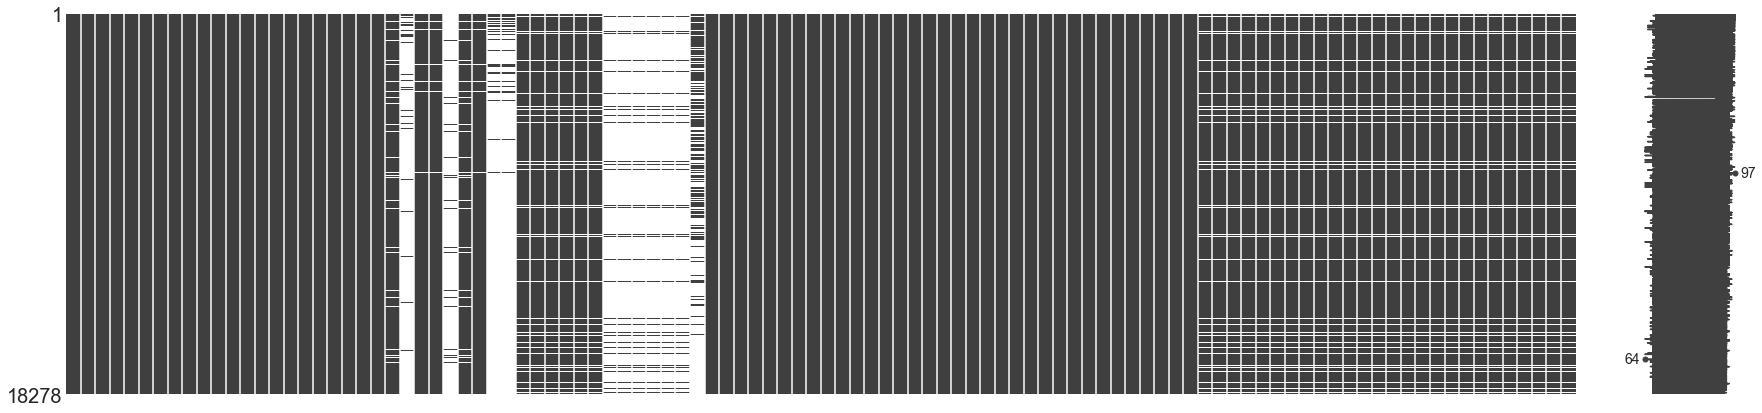

In [31]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_raw
msno.matrix(df_fifa_raw, figsize = (30, 7))

In [32]:
# Counts of missing values
null_value_stats = df_tm_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

value    984
dtype: int64

The visualisation shows us very quickly that there missing values in the `value` column.

<a id='section4'></a>

## 4. Data Engineering

<a id='section4.1'></a>

### 4.1. Introduction
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangled the data to be in a form that meet our needs.

<a id='section4.2'></a>

### 4.2. FIFA 20

<a id='section4.2.1'></a>

#### 4.2.1. Columns of Interest

Of the one hundered and four columns in the FIFA20 dataset, we are only interested in sixty seven columns, which are the following:
*    `short_name`
*    `long_name`
*    `age`
*    `dob`
*    `height_cm`
*    `weight_kg`
*    `nationality`
*    `club`
*    `overall`
*    `player_positions`
*    `preferred_foot`
*    `weak_foot`
*    `skill_moves`
*    `work_rate`
*    `body_type`
*    `player_tags`
*    `team_position`
*    `team_jersey_number`
*    `nation_position`
*    `nation_jersey_number`
*    `pace`
*    `shooting`
*    `passing`
*    `dribbling`
*    `defending`
*    `physic`
*    `gk_diving`
*    `gk_handling`
*    `gk_kicking`
*    `gk_reflexes`
*    `gk_speed`
*    `gk_positioning`
*    `player_traits`
*    `attacking_crossing`
*    `attacking_finishing`
*    `attacking_heading_accuracy`
*    `attacking_short_passing`
*    `attacking_volleys`
*    `skill_dribbling`
*    `skill_curve`
*    `skill_fk_accuracy`
*    `skill_long_passing`
*    `skill_ball_control`
*    `movement_acceleration`
*    `movement_sprint_speed`
*    `movement_agility`
*    `movement_reactions`
*    `movement_balance`
*    `power_shot_power`
*    `power_jumping`
*    `power_stamina`
*    `power_strength`
*    `power_long_shots`
*    `mentality_aggression`
*    `mentality_interceptions`
*    `mentality_positioning`
*    `mentality_vision`
*    `mentality_penalties`
*    `mentality_composure`
*    `defending_marking`
*    `defending_standing_tackle`
*    `defending_sliding_tackle`
*    `goalkeeping_diving`
*    `goalkeeping_handling`
*    `goalkeeping_kicking`
*    `goalkeeping_positioning`
*    `goalkeeping_reflexes`

In [33]:
# Select columns of interest
cols = ['short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'player_tags', 'team_position', 'team_jersey_number', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
df_fifa = df_fifa_raw[cols]

<a id='section4.2.2'></a>

#### 4.2.2. Converting Data Types
We'll next convert the `dob` column from the `object` to `datetime64[ns]` data type u using the [.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.

In [35]:
# Convert dob from string to datetime64[ns]
# df_fifa['dob'] = pd.to_datetime(df_fifa['dob'], format='%d/%m/%Y')
df_fifa['dob'] = pd.to_datetime(df_fifa['dob'], format='%Y/%m/%d')    # no idea why the line above is not the code, 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<a id='section4.2.4'></a>

#### 4.2.4. Exporting the Engineered DataFrame
Let's export the engineered DataFrame, `df_fifa` as a CSV file using the [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method. This file will be saved in the 'export' subfolder.

In [37]:
df_fifa.to_csv(dataDir + 'export/' + 'data_fifa_cleaned.csv', index = None, header=True)

<a id='section4.3'></a>

### 4.3. TransferMarkt

<a id='section4.3.1'></a>

#### 4.3.1. String Cleaning

##### DoB and Age

In [38]:
# Assign df_tm_raw DataFrame to df_tm
df_tm = df_tm_raw

# DoB string cleaning to create birth_date and age columns
df_tm[['birth_date', 'age']] = df_tm_raw['dob'].str.extract(r'(.+) \((\d+)\)')

##### Nationality
For the nationality, some of the players have duel nationality.

For example, [Claudio Pizarro](https://www.transfermarkt.co.uk/claudio-pizarro/profil/spieler/532) is a Peruvian-born player who has has made 85 appearances for Peru, scoring 20 goals. However, his citizenship according to [TransferMarkt](https://www.transfermarkt.co.uk/) is 'Peru / Italy'. For our needs, we only want to know the country the player is eligible to play for, not their full heritage.

In [39]:
# Nationaility string cleaning

## Take the first nationality i.e. text before the first space, ex. 'Peru / Italy'
df_tm['playing_country'] = df_tm['nationality'].str.split(' /').str[0]

##### Value
The values of the players are string prefixes, commas and spaces that need to be cleaned.

In [40]:
# Value string cleaning from shortened string value to full numerical value

## Convert 'm' to '000000'
df_tm['value'] = df_tm['value'].str.replace('m','0000')

## Convert 'k' to '000'
df_tm['value'] = df_tm['value'].str.replace('k','000')

## Remove '.'
df_tm['value'] = df_tm['value'].str.replace('.','')

## Remove '£' sign
df_tm['value'] = df_tm['value'].str.replace('£','')

## Remove '-'
df_tm['value'] = df_tm['value'].str.replace('-','')

## Remove '¬†¬†'
df_tm['value'] = df_tm['value'].str.replace('¬†¬†','')

## Remove gaps
df_tm['value'] = df_tm['value'].str.replace(' ','')

<a id='section4.3.2'></a>

#### 4.3.2. Converting Data Types

##### DoB

In [41]:
# Convert birth_date from string to datetime64[ns]
df_tm['birth_date'] = pd.to_datetime(df_tm['birth_date'])

##### Age

In [42]:
# Redetermine the age using the newly created birth_date column (after formatted to datetime data type)
today = datetime.today()
df_tm['age'] = df_tm['birth_date'].apply(
                lambda x: today.year - x.year - 
                ((today.month, today.day) < (x.month, x.day)) 
                )

# Convert floats to integers and leave null values
df_tm['age'] = np.nan_to_num(df_tm['age']).astype(int)

# df_tm['age'] = pd.to_numeric(df_tm['age'], downcast='signed')

##### Value

In [43]:
df_tm['value'] = pd.to_numeric(df_tm['value'])

<a id='section4.3.3'></a>

#### 4.3.3. Columns of Interest

Of the current nine columns in the [TransferMarkt](https://www.transfermarkt.co.uk/) dataset, we are only interested in five columns, which are the following:
*    `name`
*    `value`
*    `birth_date`
*    `age`
*    `playing_country`

In [46]:
df_tm = df_tm[['name', 'value', 'birth_date', 'age', 'playing_country']]

<a id='section4.3.4'></a>

#### 4.3.4. Exporting the Engineered DataFrame
Let's export the engineered DataFrame, `df_tm` as a CSV file.

In [47]:
df_fifa.to_csv(dataDir + 'export/' + 'data_tm_cleaned.csv', index = None, header=True)

Now we have created our two DataFrames and wrangled the data to meet our needs, we'll next need to merge the datasets to create a single DataFrame for [Exploratory Data Analysis ](#section5).

<a id='section4.4'></a>

### 4.4. Joined Dataset

<a id='section4.4.1'></a>

#### 4.4.1. Join the datasets using [fuzzymatcher](https://github.com/RobinL/fuzzymatcher)
We have our cleaned datasets, however, matching of the data is still a tricky process. Let's take Lionel Messi as an example.

In the FIFA database, he has the short_name of L. Messi and a long_name of Lionel Andrés Messi Cuccittini. In [TransferMarkt](https://www.transfermarkt.co.uk/), his name is Lionel Messi.

There are no real set rules for players like this. For example, many South American players can be known by a one word moniker on [TransferMarkt](https://www.transfermarkt.co.uk/) e.g. Casemiero, but then have their full names in the FIFA20 dataset e.g. Carlos Henrique Venancio Casimiro.

We are then left in a state of trying to join two data sets together that do not have a common unique identifier.

However, to combat this, we can use a third=party Python library - [fuzzymatcher](https://github.com/RobinL/fuzzymatcher), installed using pip install fuzzymatcher. Fuzzymatcher provides a simple interface to link two pandas DataFrames together using probabilistic record linkage.

We need to define which columns to match for the left and right DataFrames. In this join, the fifa data will be the left DataFrame and the [TransferMarkt](https://www.transfermarkt.co.uk/) data will be the right.

In [55]:
# Define left and right DataFrames
left_on = ["long_name", "dob", "nationality"]
right_on = ["name", "birth_date", "playing_country"]

With the folllowing code, [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) figures out the matches using fuzzy_left_join:

In [56]:
df_fifa_tm_joined = fuzzymatcher.fuzzy_left_join(df_fifa, df_tm, left_on, right_on #,
                                                 # left_id_col='x', right_id_col='y'    # useful but not using
                                                 )

Behind the scenes, [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) determines the best match for each combination.

The `df_fifa_tm_joined` DataFrame contains all the data linked together as well as as best_match_score which shows the quality of the link.

Here’s a subset of the columns rearranged in a more readable format for the top ten best matches:

In [57]:
df_fifa_tm_joined.head(10)

,best_match_score,__id_left,__id_right,short_name,long_name,age_left,dob,height_cm,weight_kg,nationality,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,name,value,birth_date,age_right,playing_country
0,0.608277,0_left,3423_right,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,...,6,11,15,14,8,Lionel Messi,100800000.0,1987-06-24,32,Argentina
2,0.385908,1_left,8878_right,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,...,7,11,15,14,11,Cristiano Ronaldo,54000000.0,1985-02-05,35,Portugal
3,0.158056,2_left,4698_right,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,...,9,9,15,15,11,Neymar,115200000.0,1992-02-05,28,Brazil
4,0.973660,3_left,3427_right,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,...,87,92,78,90,89,Jan Oblak,72000000.0,1993-01-07,27,Slovenia
5,0.895808,4_left,3396_right,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,...,11,12,6,8,8,Eden Hazard,72000000.0,1991-01-07,29,Belgium
6,0.982903,5_left,5771_right,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,...,15,13,5,10,13,Kevin De Bruyne,108000000.0,1991-06-28,28,Belgium
7,1.389511,6_left,3405_right,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,...,88,85,88,88,90,Marc-André ter Stegen,64800000.0,1992-04-30,27,Germany
8,1.180069,7_left,5783_right,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,...,13,10,13,11,11,Virgil van Dijk,72000000.0,1991-07-08,28,Netherlands
9,0.636367,8_left,3391_right,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,...,13,9,7,14,9,Luka Modric,10800000.0,1985-09-09,34,Croatia
10,0.776236,9_left,5800_right,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,...,14,14,9,11,14,Mohamed Salah,108000000.0,1992-06-15,27,Egypt


Observations:
*    18,278 total players in the database
*    13,790 matched correctly according to DoB (75.4%)
*    4,488 incorrect matched according to DoB (DoB of FIFA20 data doesn't match birth_date of [TransferMarkt](https://www.transfermarkt.co.uk/)  data)
*    In total, 4,945 players were unable to be matched

More usefully, of the top 250 players (players rated 82 and above), 12 players failed to be matched correctly. These include:
*    H. Son
*    Isco
*    Koke
*    Pepe
*    Mario Mandzukic
*    Paulinho
*    Pizzi
*    Anderson Talisca
*    Oscar
*    Louri Beretta*
*    Josue Chiamulera*
*    Ronaldo Cabrais*

Firstly, this is good because for fantasy football, the top 250 players covers most of the players to be selected.

Of these twelve players that didn't match correctly, two are Spanish, 1 Korean, 2 Portuguese, and are 6 Brazilian.

Upon inspection, the errors appear to have come from the difference between Latin American players birth names as per the database and their 'shirt' name/moniker as per the [TransferMarkt](https://www.transfermarkt.co.uk/) website.

Heung-min Son failed to match because his name in the FIFA database is in Korean where as his name on [TransferMarkt](https://www.transfermarkt.co.uk/) is in English.

[Louri Beretta](https://sofifa.com/player/230294/lourival-adnan-beretta-barbosa/200034), [Josué Durval Chiamulera Vaz](https://sofifa.com/player/230375/josue-durval-chiamulera-vaz/200035/), and [Ronaldo Cabrais](https://sofifa.com/player/230481/ronaldo-jailson-cabrais-petri/200026) are unlicensed Brazilian players who are not players in real-life and therefore cannot be matched. The data matching would be improved if these unlicensed players were detected before the data matching and then added back into the database later.

Therefore, it was infact only 9 players of the top 247 players that didn't match.

The fuzzymatcher matching is good, but to work better, greater emphasis needs to be placed on matching the DoB and not just the names. I will look to improve this by using more sophisticated alogirthms, such as [Python Record Linkage Toolkit](https://recordlinkage.readthedocs.io/en/latest/about.html).

#### 4.4.2. Fix Bad Matches
For the 4,488 incorrect matches according to DoB, the 'value' of the player will be nullified to prevent misrepresentation of players values in the dataset. Other mismatched columns including `birth_date`, `age_right`, and `playing_country` are going to be removed anyway and therefore don't needed to be fixed.

In [58]:
df_fifa_tm_joined = df_fifa_tm_joined[['short_name', 'long_name', 'name', 'age_left', 'dob', 'birth_date', 'value',  'nationality', 'club', 'overall', 'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'height_cm', 'weight_kg', 'body_type', 'player_tags', 'team_position', 'team_jersey_number', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [59]:
df_fifa_tm_joined['value'] = np.where((df_fifa_tm_joined['dob'] != df_fifa_tm_joined['birth_date']), np.nan, df_fifa_tm_joined['value'])

<a id='section4.4.2'></a>

#### 4.4.3. Reorganise the New Dataset

In [61]:
# Rename some columns
df_fifa_tm_joined = df_fifa_tm_joined.rename(columns={'long_name':'player_name',
                                                      'age_left': 'age',
                                                      'dob': 'date_of_birth',
                                                      'value': 'value_gbp',
                                                      'overall': 'overall_fifa_rating' 
                                             })

# Select only columns of interest, reorganise columns and remove some duplicate columns
df_fifa_tm_joined = df_fifa_tm_joined[['player_name', 'age', 'date_of_birth', 'value_gbp', 'overall_fifa_rating', 'nationality', 'club', 'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'height_cm', 'weight_kg', 'body_type', 'player_tags', 'team_position', 'team_jersey_number', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]

# Order by player rating
df_fifa_tm_joined = df_fifa_tm_joined.sort_values(by='overall_fifa_rating', ascending=False)

<a id='section4.4.3'></a>

#### 4.4.4. Exporting the Joined DataFrame
Let's export the merged DataFrame, `df_fifa_tm_joined` as a CSV file.

In [62]:
df_fifa_tm_joined.to_csv(dataDir + 'export/' + 'data_fifa_tm_joined.csv', index = None, header=True)

Now we have created a pandas DataFrame and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5) to determine the best value players in the FIFA20 database.

<a id='section5'></a>

## 5. Exploratory Data Analysis

<a id='section5.1'></a>

### 5.1. Create New Metrics - Rating per GBP
Before conducting the analysis and searching for value-for-money players, we need to create a new metric Rating per GBP. Those players with a higher Rating per GBP are better value players.

In [63]:
# Create new metric - Rating per GBP
df_fifa_tm_joined['rating_per_gbp'] = df_fifa_tm_joined['overall_fifa_rating'] / df_fifa_tm_joined['value_gbp']

In [65]:
# Order descending by newly created Rating per GBP column
df_fifa_tm_joined = df_fifa_tm_joined.sort_values(by='rating_per_gbp', ascending=False)

# Reorder columns with 'rating_per_gbp' as the sixth column
df_fifa_tm_joined = df_fifa_tm_joined[['player_name', 'age', 'date_of_birth', 'value_gbp', 'overall_fifa_rating', 'rating_per_gbp', 'nationality', 'club', 'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'height_cm', 'weight_kg', 'body_type', 'player_tags', 'team_position', 'team_jersey_number', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]

# Display the first 25 players
df_fifa_tm_joined.head(25)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
397297,Alex Woodyard,26,1992-11-16,23000.0,66,0.002870,England,Peterborough United,"CM, CDM",Right,...,51,69,66,66,64,8,8,8,13,13
490453,隋东陆,36,1983-06-21,23000.0,65,0.002826,China PR,Henan Jianye FC,"CB, CDM",Right,...,38,50,67,63,61,10,8,16,13,6
572309,卢琳,34,1985-02-03,23000.0,64,0.002783,China PR,Guangzhou R&F FC,"LM, LW, CDM",Left,...,49,50,59,50,56,11,7,9,7,11
636873,Abdullah Haif Al Shammari,25,1993-09-17,23000.0,63,0.002739,Saudi Arabia,Al Hazem,"CB, LB",Left,...,33,51,60,66,63,10,14,14,9,11
640436,Aaron Chapman,29,1990-05-29,23000.0,63,0.002739,England,Peterborough United,GK,Right,...,23,46,21,12,13,66,60,57,62,65
655958,Meshari Al Thmali,27,1992-02-10,23000.0,63,0.002739,Saudi Arabia,Al Faisaly,"CAM, CDM, CM",Right,...,55,44,63,60,59,10,8,9,14,8
624689,Mohammed Helal,23,1995-08-10,23000.0,63,0.002739,United Arab Emirates,Al Ain FC,CM,Left,...,45,63,50,48,45,6,7,9,8,10
663736,Bandar Al Mutairi,29,1990-03-14,23000.0,63,0.002739,Saudi Arabia,Al Fayha,LWB,Left,...,37,53,58,61,56,7,6,13,8,9
616621,Happy Mashiane,21,1998-01-01,23000.0,63,0.002739,South Africa,Kaizer Chiefs,"LB, LM",Left,...,41,55,55,65,59,9,11,14,6,7
643122,Luke Waterfall,28,1990-07-30,23000.0,63,0.002739,England,Grimsby Town,CB,Right,...,40,53,59,62,62,12,8,6,8,16


The new metric is created and will be useful, however, many of the highest value players in terms of Rating per GBP are quit low rated players in the mid-fifty to mid-sixty range, which are not great. We're looking for a team of high-seventy or over players. We can apply filters in the next stage of our analysis.

<a id='section5.2'></a>

### 5.2. Analysis 

<a id='section5.2.1'></a>

#### 5.2.1 Bargain players - under 1 mil
First let's look for the best rated players we can find for a bargain place. 1 million per player is a good place to start.

Even though we want cheap players, we only want players of a certain standard. In FIFA, a rating of 74 or over is a useful benchmark as these are considered top rated 'silver' (74) or 'gold' (75-99) players as per the [Ultimate Team rating system](https://www.fifauteam.com/fifa-20-players-cards-guide/).

##### DataFrame

In [387]:
# Assign df_fifa_tm_joined DataFrame to a new DataFrame, df_bargains
df_bargains = df_fifa_tm_joined

# Highly rated players only (rating of 74 or over)
df_bargains = df_bargains.loc[(df_bargains['overall_fifa_rating'] >= 77) & (df_bargains['value_gbp'] <= 1_000_000)]

# Display the top 25 players as per rating_per_gbp with a rating of 77 or over
df_bargains.head(60)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
20386,Vitorino Hilton da Silva,41,1977-09-13,90000.0,78,0.000867,Brazil,Montpellier HSC,CB,Right,...,64,77,83,77,76,12,7,11,12,13
26807,Douglas Renato de Jesus,36,1983-03-09,180000.0,77,0.000428,Brazil,Vitória Guimarães,GK,Right,...,14,56,18,10,12,78,75,71,74,77
27054,Pedro Pablo Hernández,32,1986-10-24,270000.0,77,0.000285,Chile,Independiente,"CM, CAM, CDM",Left,...,64,71,55,68,66,6,15,9,15,10
26482,Renato Civelli,35,1983-10-14,270000.0,77,0.000285,Argentina,Club Atlético Banfield,CB,Right,...,58,75,78,76,66,13,6,16,14,10
9862,Javier Alejandro Mascherano,35,1984-06-08,293000.0,80,0.000273,Argentina,Hebei China Fortune FC,"CDM, CB",Right,...,60,81,77,81,80,6,10,8,5,5
7139,Ricardo Andrade Quaresma Bernardo,35,1983-09-26,360000.0,81,0.000225,Portugal,Beşiktaş JK,"RM, LM",Right,...,73,82,29,17,11,12,14,10,5,15
27056,Michael Esser,31,1987-11-22,360000.0,77,0.000214,Germany,Hannover 96,GK,Right,...,23,53,20,15,16,77,74,64,75,82
26423,Daniel Baier,35,1984-05-18,360000.0,77,0.000214,Germany,FC Augsburg,"CDM, CM",Right,...,62,84,72,74,72,7,9,7,9,9
21507,Bruno Soriano Llido,35,1984-06-12,428000.0,78,0.000182,Spain,Villarreal CF,"CM, CDM",Left,...,75,82,77,78,77,13,10,9,11,8
25823,Daler Kuzyaev,26,1993-01-15,428000.0,77,0.000180,Russia,Russia,"CM, CDM, RM",Right,...,63,64,71,77,76,15,16,13,7,8


##### Visualisation

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35895 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 37096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 38263 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 35895 missing from cur

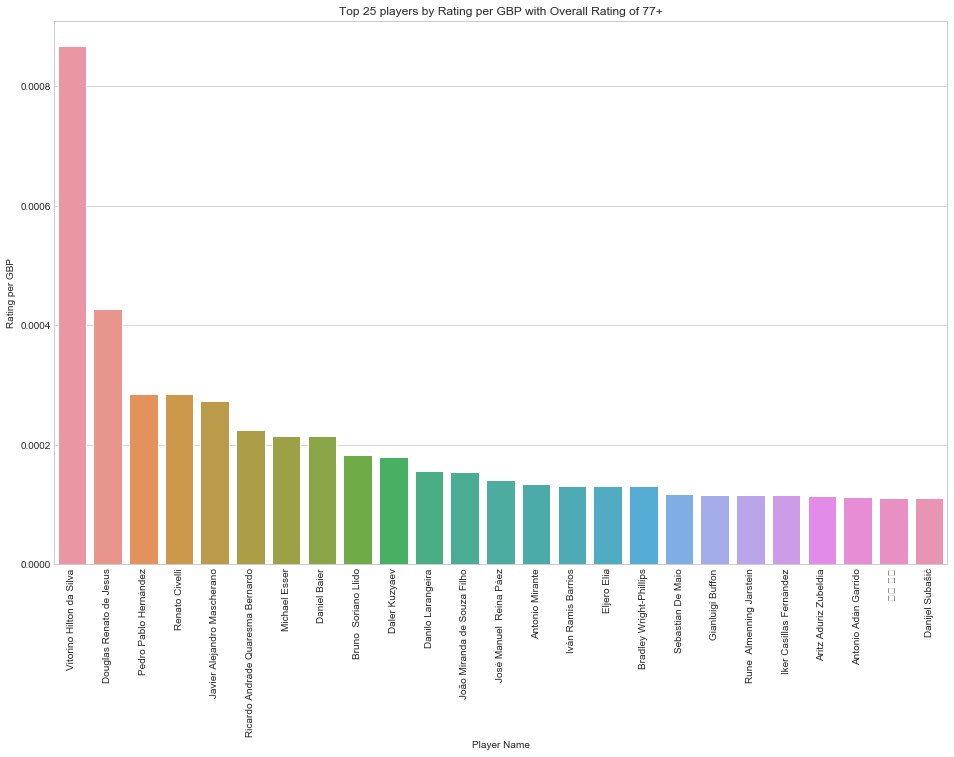

In [388]:
# Plot the top 25 players as per rating_per_gbp with a rating of 77 or over
df_bargains_top25 = df_bargains.nlargest(25, 'rating_per_gbp')

# Set the width and height of the figure
plt.figure(figsize=(16,10))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Top 25 players by Rating per GBP with Overall Rating of 77+")

# Bar chart showing the top 25 players by Rating per GBP
sns_plot_1 = sns.barplot(x = df_bargains_top25['player_name'], y = df_bargains_top25['rating_per_gbp'])

# Add labels for axes
plt.xlabel("Player Name")
plt.ylabel("Rating per GBP")

# Rotate xticks
plt.xticks(rotation = 90)

# Save plot
fig_1 = sns_plot_1.get_figure()
fig_1.savefig("./img/fig/top25_rating_per_gbp_77+.png") 

##### Team Graphic

![title](img/1mil.png)

##### Analysis

In [389]:
# List all players selected
first_xi = ['Gianluigi Buffon',
            'Vitorino Hilton da Silva',
            'João Miranda de Souza Filho',
            '長谷 部誠', 'Eljero Elia',
            'Bruno Soriano Llido',
            'Javier Alejandro Mascherano',
            'Ricardo Andrade Quaresma Bernardo',
            'Pedro Pablo Hernández',
            'Carlos Alberto Tevez',
            'Aritz Aduriz Zubeldia']

subsitutes = ['Iker Casillas Fernández',
              'José Manuel Reina Páez',
              'Dante Bonfim da Costa Santos',
              'Martin Škrtel',
              'Marcelo Augusto Ferreira Teixeira',
              'Klaas-Jan Huntelaar',
              'Guillaume Hoarau']

full_squad = first_xi + subsitutes

In [390]:
df_bargain_squad = df_fifa_tm_joined[df_fifa_tm_joined['player_name'].isin(full_squad)]

In [391]:
df_bargain_squad.head(18)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
20386,Vitorino Hilton da Silva,41,1977-09-13,90000.0,78,0.000867,Brazil,Montpellier HSC,CB,Right,...,64,77,83,77,76,12,7,11,12,13
27054,Pedro Pablo Hernández,32,1986-10-24,270000.0,77,0.000285,Chile,Independiente,"CM, CAM, CDM",Left,...,64,71,55,68,66,6,15,9,15,10
9862,Javier Alejandro Mascherano,35,1984-06-08,293000.0,80,0.000273,Argentina,Hebei China Fortune FC,"CDM, CB",Right,...,60,81,77,81,80,6,10,8,5,5
7139,Ricardo Andrade Quaresma Bernardo,35,1983-09-26,360000.0,81,0.000225,Portugal,Beşiktaş JK,"RM, LM",Right,...,73,82,29,17,11,12,14,10,5,15
3156,João Miranda de Souza Filho,34,1984-09-07,540000.0,83,0.000154,Brazil,Jiangsu Suning FC,CB,Right,...,49,81,85,85,83,12,6,10,13,12
26729,Eljero Elia,32,1987-02-13,585000.0,77,0.000132,Netherlands,Medipol Başakşehir FK,"LM, LW",Right,...,62,71,38,32,28,11,13,6,15,8
3146,Gianluigi Buffon,41,1978-01-28,720000.0,83,0.000115,Italy,Juventus,GK,Right,...,22,70,13,11,11,78,77,74,91,80
3147,Iker Casillas Fernández,38,1981-05-20,720000.0,83,0.000115,Spain,FC Porto,GK,Left,...,24,70,24,11,13,85,75,61,86,84
4547,Aritz Aduriz Zubeldia,38,1981-02-11,720000.0,82,0.000114,Spain,Athletic Club de Bilbao,ST,Right,...,86,87,58,44,49,14,10,9,15,9
10372,長谷 部誠,35,1984-01-18,720000.0,80,0.000111,Japan,Eintracht Frankfurt,"CB, CDM",Right,...,61,85,86,83,80,10,12,10,15,9


In [392]:
# Created groupedby DataFrame, by date and journey_full
df_fifa_tm_joined_grouped = df_fifa_tm_joined.groupby(
   ['overall_fifa_rating']
).agg(
    {
         'value_gbp': 'mean'    # count the unique start_times to identify each journey
    }
).reset_index()    # reset index to get grouped columns back

# Rename columns
df_fifa_tm_joined_grouped.columns = ['overall_fifa_rating', 'average_value_gbp']

In [393]:
# Total value of Bargain squad
squad_name = 'Bargain'
total_players = 18
total_value_millions = round(((df_bargain_squad['value_gbp'].sum())) / 1_000_000, 2)
average_value_million = round(((df_bargain_squad['value_gbp'].mean()) / 1_000_000), 2) 
average_rating = int(round(df_bargain_squad['overall_fifa_rating'].mean(), 0))
average_rating_average_price = round(((df_fifa_tm_joined_grouped[df_fifa_tm_joined_grouped['overall_fifa_rating'] == average_rating ]['average_value_gbp'].item()) / 1_000_000), 2)
average_rating_average_squad_price = round((average_rating_average_price * total_players), 2)
squad_saving = round((average_rating_average_squad_price - total_value_millions), 2)

In [394]:
# Print of of stats from this squad
print(f"• The total cost of the {total_players} man {squad_name} squad is £{total_value_millions}mil.\n"
      f"• The average player value in this squad is £{average_value_million}mil and the average player rating is {average_rating}.\n"
      f"• The average price of players of that rating is: £{average_rating_average_price}mil which would cost £{average_rating_average_squad_price}mil for an {total_players} man squad.\n"
      f"• This equates to a total saving of £{squad_saving}mil.")

• The total cost of the 18 man Bargain squad is £9.47mil.
• The average player value in this squad is £0.59mil and the average player rating is 80.
• The average price of players of that rating is: £12.13mil which would cost £218.34mil for an 18 man squad.
• This equates to a total saving of £208.87mil.


Points to discuss
*    Total cost of the team and Average cost per player in team 
*    Average rating of team
*    Use aforementioned values to them to the average cost per player of the aforementioned average rating of the team. Show savings

<a id='section5.1.2'></a>

#### 5.2.2 Value for Money Players (84+)
We've seen the bargain, but what about if we want to find the higher rated player that are still at a cut price. Let's race the filter to a rating of 84 and over.

##### DataFrame

In [395]:
# Assign df_fifa_tm_joined DataFrame to a new DataFrame, df_value
df_value = df_fifa_tm_joined

# Highly rated players only (rating of 84 or over)
df_value = df_value.loc[(df_value['overall_fifa_rating'] >= 84)]

# Display the top 25 players as per rating_per_gbp with a rating of 84 or over
df_value.head(25)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1616,Stéphane Ruffier,32,1986-09-27,2160000.0,84,0.000039,France,AS Saint-Étienne,GK,Right,...,25,66,13,12,11,82,84,75,85,82
1091,Zlatan Ibrahimović,37,1981-10-03,2520000.0,85,0.000034,Sweden,LA Galaxy,ST,Right,...,89,90,28,37,24,13,15,10,9,12
18,Giorgio Chiellini,34,1984-08-14,3600000.0,89,0.000025,Italy,Juventus,CB,Left,...,50,84,94,91,89,3,3,2,4,3
32,Samir Handanovič,34,1984-07-14,4320000.0,88,0.000020,Slovenia,Inter,GK,Right,...,23,69,25,10,13,88,85,69,89,89
288,Thiago Emiliano da Silva,34,1984-09-22,4320000.0,87,0.000020,Brazil,Paris Saint-Germain,CB,Right,...,60,86,88,88,85,9,12,5,9,10
1620,Lucas Pezzini Leiva,32,1987-01-09,5400000.0,84,0.000016,Brazil,Lazio,CDM,Right,...,61,86,82,84,81,10,8,8,5,6
1617,Salvatore Sirigu,32,1987-01-12,5850000.0,84,0.000014,Italy,Torino,GK,Right,...,19,62,14,11,13,84,80,76,84,82
1403,Jiří Pavlenka,27,1992-04-14,5850000.0,84,0.000014,Czech Republic,SV Werder Bremen,GK,Right,...,18,39,12,10,14,86,79,70,80,88
1618,Marek Hamšík,31,1987-07-27,6120000.0,84,0.000014,Slovakia,Dalian YiFang FC,CM,Right,...,70,84,75,70,62,8,6,4,14,14
37,Diego Godín,33,1986-02-16,7200000.0,88,0.000012,Uruguay,Inter,CB,Right,...,50,82,90,89,87,6,8,15,5,15


##### Visualisation

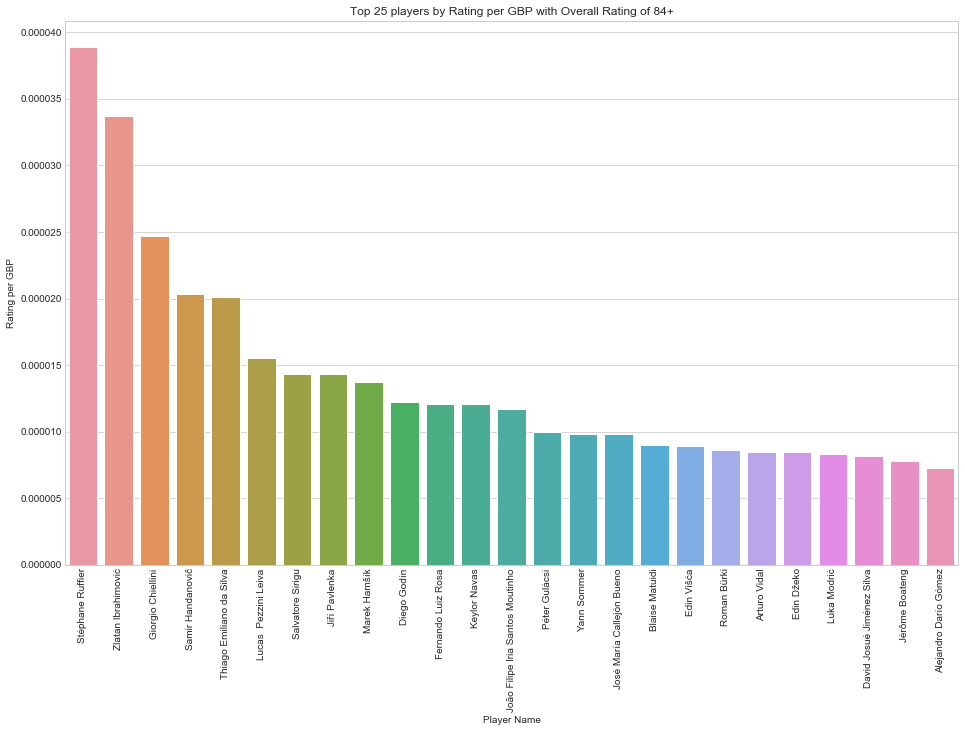

In [396]:
# Plot the top 25 players as per rating_per_gbp with a rating of 84 or over
df_value_top25 = df_value.nlargest(25, 'rating_per_gbp')

# Set the width and height of the figure
plt.figure(figsize=(16,10))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Top 25 players by Rating per GBP with Overall Rating of 84+")

# Bar chart showing the top 25 players by Rating per GBP
sns_plot_2 = sns.barplot(x = df_value_top25['player_name'], y = df_value_top25['rating_per_gbp'])

# Add labels for axes
plt.xlabel("Player Name")
plt.ylabel("Rating per GBP")

# Rotate xticks
plt.xticks(rotation = 90)

# Save plot
fig_2 = sns_plot_2.get_figure()
fig_2.savefig("./img/fig/top25_rating_per_gbp_84+.png") 

##### Team Graphic

![title](img/bargains.png)

In [397]:
# List all players selected
first_xi = ['Samir Handanovič',
            'Giorgio Chiellini',
            'Thiago Emiliano da Silva',
            'Diego Godín',
            'Edin Višća',
            'Fernando Luiz Rosa',
            'Blaise Matuidi',
            'José María Callejón Bueno	',
            'Luka Modrić',
            'Zlatan Ibrahimović',
            'Edin Džeko']

subsitutes = ['Keylor Navas',
              'João Miranda de Souza Filho',
              'Arturo Vidal',
              'Marek Hamšík',
              'Lucas Pezzini Leiva',
              'Radamel Falcao García Zárate',
              'Edin Džeko']

full_squad = first_xi + subsitutes

In [398]:
df_value_squad = df_fifa_tm_joined[df_fifa_tm_joined['player_name'].isin(full_squad)]

In [399]:
df_value_squad.head(18)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
3156,João Miranda de Souza Filho,34,1984-09-07,540000.0,83,0.000154,Brazil,Jiangsu Suning FC,CB,Right,...,49,81,85,85,83,12,6,10,13,12
1091,Zlatan Ibrahimović,37,1981-10-03,2520000.0,85,0.000034,Sweden,LA Galaxy,ST,Right,...,89,90,28,37,24,13,15,10,9,12
18,Giorgio Chiellini,34,1984-08-14,3600000.0,89,0.000025,Italy,Juventus,CB,Left,...,50,84,94,91,89,3,3,2,4,3
32,Samir Handanovič,34,1984-07-14,4320000.0,88,0.000020,Slovenia,Inter,GK,Right,...,23,69,25,10,13,88,85,69,89,89
288,Thiago Emiliano da Silva,34,1984-09-22,4320000.0,87,0.000020,Brazil,Paris Saint-Germain,CB,Right,...,60,86,88,88,85,9,12,5,9,10
3155,Radamel Falcao García Zárate,33,1986-02-10,4320000.0,83,0.000019,Colombia,AS Monaco,ST,Right,...,81,85,39,42,19,10,13,6,9,5
1618,Marek Hamšík,31,1987-07-27,6120000.0,84,0.000014,Slovakia,Dalian YiFang FC,CM,Right,...,70,84,75,70,62,8,6,4,14,14
37,Diego Godín,33,1986-02-16,7200000.0,88,0.000012,Uruguay,Inter,CB,Right,...,50,82,90,89,87,6,8,15,5,15
287,Fernando Luiz Rosa,34,1985-05-04,7200000.0,87,0.000012,Brazil,Manchester City,CDM,Right,...,61,81,87,86,80,12,11,5,13,7
296,Keylor Navas,32,1986-12-15,7200000.0,87,0.000012,Costa Rica,Real Madrid,GK,Right,...,25,67,28,14,14,90,81,75,82,90


In [400]:
# Total value of Value squad
squad_name = 'Best Value'
total_players = 18
total_value_millions = round(((df_value_squad['value_gbp'].sum())) / 1_000_000, 2)
average_value_million = round(((df_value_squad['value_gbp'].mean()) / 1_000_000), 2) 
average_rating = int(round(df_value_squad['overall_fifa_rating'].mean(), 0))
average_rating_average_price = round(((df_fifa_tm_joined_grouped[df_fifa_tm_joined_grouped['overall_fifa_rating'] == average_rating ]['average_value_gbp'].item()) / 1_000_000), 2)
average_rating_average_squad_price = round((average_rating_average_price * total_players), 2)
squad_saving = round((average_rating_average_squad_price - total_value_millions), 2)

In [401]:
# Print of of stats from this squad
print(f"• The total cost of the {total_players} man {squad_name} squad is £{total_value_millions}mil.\n"
      f"• The average player value in this squad is £{average_value_million}mil and the average player rating is {average_rating}.\n"
      f"• The average price of players of that rating is: £{average_rating_average_price}mil which would cost £{average_rating_average_squad_price}mil for an {total_players} man squad.\n"
      f"• This equates to a total saving of £{squad_saving}mil.")

• The total cost of the 18 man Best Value squad is £96.84mil.
• The average player value in this squad is £6.46mil and the average player rating is 86.
• The average price of players of that rating is: £40.08mil which would cost £721.44mil for an 18 man squad.
• This equates to a total saving of £624.6mil.


<a id='section5.2.3'></a>

#### 5.2.3 Elite Players on a Budget (84+ and minimum pace)
We've seen...

##### DataFrame

In [423]:
# Assign df_fifa_tm_joined DataFrame to a new DataFrame, df_value
df_value_pace = df_fifa_tm_joined

# Highly rated players only (rating of 84 or over)
df_value_pace = df_value_pace.loc[(df_value['overall_fifa_rating'] >= 84) & (df_value_pace['pace'] >= 70) & (df_value_pace['value_gbp'] <= 25_000_000)]

# Display the top 25 players as per rating_per_gbp with a rating of 84 or over and minimum 70 pace
df_value_pace.head(25)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1883,José María Callejón Bueno,32,1987-02-11,8550000.0,84,0.000010,Spain,Napoli,"RM, RW",Right,...,62,79,64,32,32,8,5,14,11,11
1095,Blaise Matuidi,32,1987-04-09,9450000.0,85,0.000009,France,Juventus,"CDM, CM",Left,...,56,82,85,84,86,8,11,5,10,14
2333,Edin Višća,29,1990-02-17,9450000.0,84,0.000009,Bosnia Herzegovina,Medipol Başakşehir FK,"RM, RW",Right,...,75,82,55,40,40,8,14,14,12,16
9,Luka Modrić,33,1985-09-09,10800000.0,90,0.000008,Croatia,Real Madrid,CM,Right,...,82,92,68,76,71,13,9,7,14,9
1093,Alejandro Darío Gómez,31,1988-02-15,11700000.0,85,0.000007,Argentina,Atalanta,"CAM, CF, ST",Right,...,72,84,50,30,34,8,11,12,9,6
20,Sergio Ramos García,33,1986-03-30,13050000.0,89,0.000007,Spain,Real Madrid,CB,Right,...,86,84,85,87,90,11,8,9,7,11
1619,Sokratis Papastathopoulos,31,1988-06-09,13050000.0,84,0.000006,Greece,Arsenal,CB,Right,...,24,81,85,86,86,6,8,5,12,5
1100,Iago Aspas Juncal,31,1987-08-01,14400000.0,85,0.000006,Spain,RC Celta,"ST, RW",Left,...,82,85,39,21,18,12,16,9,12,13
1097,Marcelo Vieira da Silva Júnior,31,1988-05-12,14400000.0,85,0.000006,Brazil,Real Madrid,LB,Left,...,59,85,71,79,82,12,5,5,5,9
2331,Josip Iličić,31,1988-01-29,15750000.0,84,0.000005,Slovenia,Atalanta,"CF, ST",Left,...,78,80,53,32,26,13,13,8,12,6


##### Visualisation

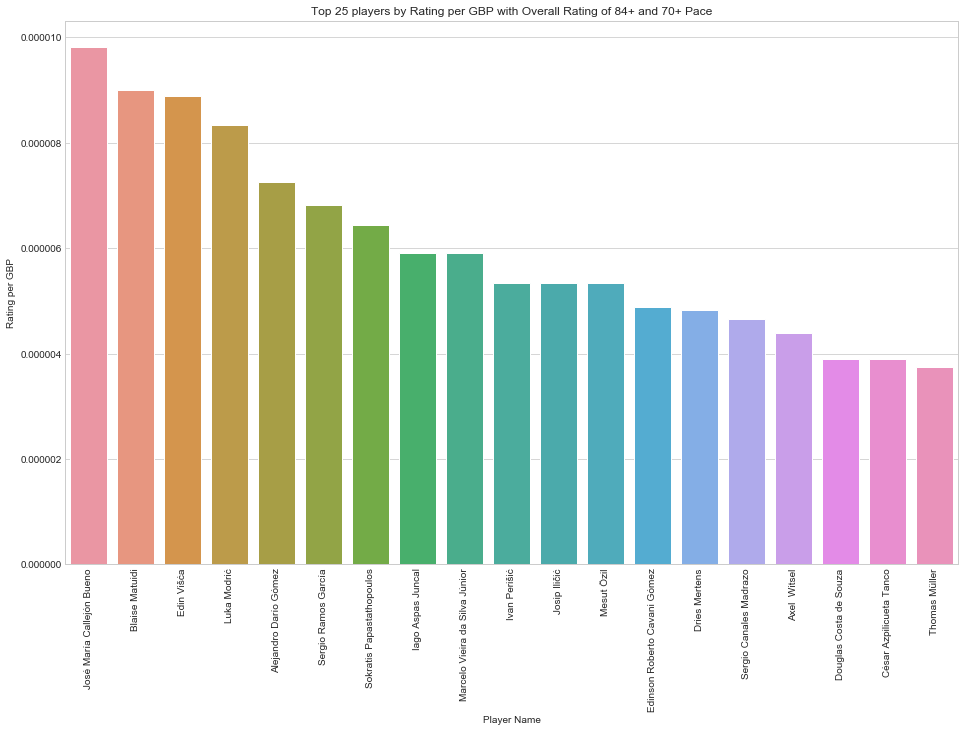

In [424]:
# Plot the top 25 players as per rating_per_gbp with a rating of 84 or over
df_value_pace_top25 = df_value_pace.nlargest(25, 'rating_per_gbp')

# Set the width and height of the figure
plt.figure(figsize=(16,10))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Top 25 players by Rating per GBP with Overall Rating of 84+ and 70+ Pace")

# Bar chart showing the top 25 players by Rating per GBP
sns_plot_3 = sns.barplot(x = df_value_pace_top25['player_name'], y = df_value_pace_top25['rating_per_gbp'])

# Add labels for axes
plt.xlabel("Player Name")
plt.ylabel("Rating per GBP")

# Rotate xticks
plt.xticks(rotation = 90)

# Save plot
fig_3 = sns_plot_3.get_figure()
fig_3.savefig("./img/fig/top25_rating_per_gbp_84+_pace.png") 

##### Team Graphic

![title](img/bargainspace.png)

In [425]:
# List all players selected
first_xi = ['Manuel Neuer',
            'Marcelo Vieira da Silva Júnior',
            'Sergio Ramos García',
            'Kostas Manolas',
            'César Azpilicueta Tanco',
            'Leon Goretzka',
            'Alejandro Darío Gómez',
            'Blaise Matuidi	',
            'Ivan Perišić',
            'Edinson Roberto Cavani Gómez',
            'José María Callejón Bueno']

subsitutes = ['Sokratis Papastathopoulos',
              'Axel Witsel',
              'Douglas Costa de Souza',
              'Edin Višća',
              'Mesut Özil',
              'Sergio Canales Madrazo',
              'Dries Mertens']

full_squad = first_xi + subsitutes

In [426]:
df_value_pace_squad = df_fifa_tm_joined[df_fifa_tm_joined['player_name'].isin(full_squad)]

In [427]:
df_value_pace_squad.head(18)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1883,José María Callejón Bueno,32,1987-02-11,8550000.0,84,0.000010,Spain,Napoli,"RM, RW",Right,...,62,79,64,32,32,8,5,14,11,11
2333,Edin Višća,29,1990-02-17,9450000.0,84,0.000009,Bosnia Herzegovina,Medipol Başakşehir FK,"RM, RW",Right,...,75,82,55,40,40,8,14,14,12,16
1093,Alejandro Darío Gómez,31,1988-02-15,11700000.0,85,0.000007,Argentina,Atalanta,"CAM, CF, ST",Right,...,72,84,50,30,34,8,11,12,9,6
20,Sergio Ramos García,33,1986-03-30,13050000.0,89,0.000007,Spain,Real Madrid,CB,Right,...,86,84,85,87,90,11,8,9,7,11
33,Manuel Neuer,33,1986-03-27,13050000.0,88,0.000007,Germany,FC Bayern München,GK,Right,...,47,70,17,10,11,87,87,91,85,87
1619,Sokratis Papastathopoulos,31,1988-06-09,13050000.0,84,0.000006,Greece,Arsenal,CB,Right,...,24,81,85,86,86,6,8,5,12,5
1097,Marcelo Vieira da Silva Júnior,31,1988-05-12,14400000.0,85,0.000006,Brazil,Real Madrid,LB,Left,...,59,85,71,79,82,12,5,5,5,9
1621,Mesut Özil,30,1988-10-15,15750000.0,84,0.000005,Germany,Arsenal,"CAM, RW",Left,...,67,83,24,16,19,6,14,10,6,14
1626,Ivan Perišić,30,1989-02-02,15750000.0,84,0.000005,Croatia,FC Bayern München,LM,Right,...,76,80,64,52,54,6,7,10,9,6
36,Edinson Roberto Cavani Gómez,32,1987-02-14,18000000.0,88,0.000005,Uruguay,Paris Saint-Germain,ST,Right,...,85,80,57,48,39,12,5,13,13,10


In [428]:
# Total value of Elite squad
squad_name = 'Elite'
total_players = 18
total_value_millions = round(((df_value_pace_squad['value_gbp'].sum())) / 1_000_000, 2)
average_value_million = round(((df_value_pace_squad['value_gbp'].mean()) / 1_000_000), 2) 
average_rating = int(round(df_value_pace_squad['overall_fifa_rating'].mean(), 0))
average_rating_average_price = round(((df_fifa_tm_joined_grouped[df_fifa_tm_joined_grouped['overall_fifa_rating'] == average_rating ]['average_value_gbp'].item()) / 1_000_000), 2)
average_rating_average_squad_price = round((average_rating_average_price * total_players), 2)
squad_saving = round((average_rating_average_squad_price - total_value_millions), 2)

In [429]:
# Print of of stats from this squad
print(f"• The total cost of the {total_players} man {squad_name} squad is £{total_value_millions}mil.\n"
      f"• The average player value in this squad is £{average_value_million}mil and the average player rating is {average_rating}.\n"
      f"• The average price of players of that rating is: £{average_rating_average_price}mil which would cost £{average_rating_average_squad_price}mil for an {total_players} man squad.\n"
      f"• This equates to a total saving of £{squad_saving}mil.")

• The total cost of the 18 man Elite squad is £276.75mil.
• The average player value in this squad is £17.3mil and the average player rating is 85.
• The average price of players of that rating is: £35.97mil which would cost £647.46mil for an 18 man squad.
• This equates to a total saving of £370.71mil.


<a id='section5.2.4'></a>

#### 5.2.4 Elite Players on a Budget (89+)
We've seen...

##### DataFrame

In [430]:
# Assign df_fifa_tm_joined DataFrame to a new DataFrame, df_value
df_elite = df_fifa_tm_joined

# Highly rated players only (rating of 85 or over, pace over 70 and a value less than £60mil)
df_elite = df_elite.loc[(df_value['overall_fifa_rating'] >= 85) & (df_elite['pace'] >= 70) & (df_elite['value_gbp'] <= 60_000_000)]

# Display the top 25 players as per rating_per_gbp with a rating of 85 or over and minimum 70 pace and a value less than £60mil
df_elite.head(25)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1095,Blaise Matuidi,32,1987-04-09,9450000.0,85,0.000009,France,Juventus,"CDM, CM",Left,...,56,82,85,84,86,8,11,5,10,14
9,Luka Modrić,33,1985-09-09,10800000.0,90,0.000008,Croatia,Real Madrid,CM,Right,...,82,92,68,76,71,13,9,7,14,9
1093,Alejandro Darío Gómez,31,1988-02-15,11700000.0,85,0.000007,Argentina,Atalanta,"CAM, CF, ST",Right,...,72,84,50,30,34,8,11,12,9,6
20,Sergio Ramos García,33,1986-03-30,13050000.0,89,0.000007,Spain,Real Madrid,CB,Right,...,86,84,85,87,90,11,8,9,7,11
1100,Iago Aspas Juncal,31,1987-08-01,14400000.0,85,0.000006,Spain,RC Celta,"ST, RW",Left,...,82,85,39,21,18,12,16,9,12,13
1097,Marcelo Vieira da Silva Júnior,31,1988-05-12,14400000.0,85,0.000006,Brazil,Real Madrid,LB,Left,...,59,85,71,79,82,12,5,5,5,9
36,Edinson Roberto Cavani Gómez,32,1987-02-14,18000000.0,88,0.000005,Uruguay,Paris Saint-Germain,ST,Right,...,85,80,57,48,39,12,5,13,13,10
291,Dries Mertens,32,1987-05-06,18000000.0,87,0.000005,Belgium,Napoli,"CF, ST",Right,...,79,81,25,40,40,7,10,8,10,4
1098,Axel Witsel,30,1989-01-12,19350000.0,85,0.000004,Belgium,Borussia Dortmund,"CDM, CM",Right,...,76,92,82,85,83,5,7,7,10,7
796,Thomas Müller,29,1989-09-13,22950000.0,86,0.000004,Germany,FC Bayern München,"CAM, RM, RW",Right,...,60,84,44,57,46,6,7,11,14,14


##### Visualisation

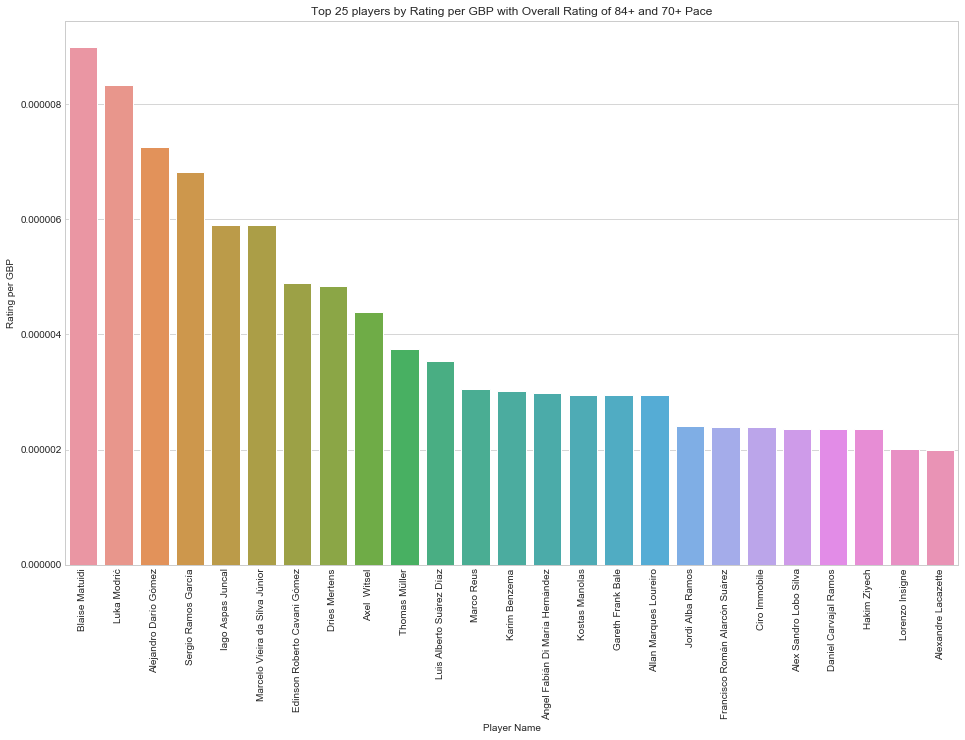

In [431]:
# Plot the top 25 players as per rating_per_gbp with a rating of 84 or over
df_elite_top25 = df_elite.nlargest(25, 'rating_per_gbp')

# Set the width and height of the figure
plt.figure(figsize=(16,10))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Top 25 players by Rating per GBP with Overall Rating of 84+ and 70+ Pace")

# Bar chart showing the top 25 players by Rating per GBP
sns_plot_4 = sns.barplot(x = df_elite_top25['player_name'], y = df_elite_top25['rating_per_gbp'])

# Add labels for axes
plt.xlabel("Player Name")
plt.ylabel("Rating per GBP")

# Rotate xticks
plt.xticks(rotation = 90)

# Save plot
fig_4 = sns_plot_4.get_figure()
fig_4.savefig("./img/fig/top25_rating_per_gbp_85+_pace.png") 

##### Team Graphic

![title](img/elite.png)

In [445]:
# List all players selected
first_xi = ['Manuel Neuer',
            'Jordi Alba Ramos',
            'Sergio Ramos García',
            'Kalidou Koulibaly',
            'Daniel Carvajal Ramos',
            'Luka Modrić',
            'Marco Reus',
            'Allan Marques Loureiro',
            'Lorenzo Insigne',
            'Cristiano Ronaldo dos Santos Aveiro',
            'Ángel Fabián Di María Hernández']

subsitutes = ['Marcelo Vieira da Silva Júnior',
              'Raphaël Varane',
              'Blaise Matuidi',
              'Gareth Frank Bale',
              'Pierre-Emerick Aubameyang',
              'Robert Lewandowski',
              'Francisco Román Alarcón Suárez']

full_squad = first_xi + subsitutes

In [446]:
df_elite.head(60)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1095,Blaise Matuidi,32,1987-04-09,9450000.0,85,0.000009,France,Juventus,"CDM, CM",Left,...,56,82,85,84,86,8,11,5,10,14
9,Luka Modrić,33,1985-09-09,10800000.0,90,0.000008,Croatia,Real Madrid,CM,Right,...,82,92,68,76,71,13,9,7,14,9
1093,Alejandro Darío Gómez,31,1988-02-15,11700000.0,85,0.000007,Argentina,Atalanta,"CAM, CF, ST",Right,...,72,84,50,30,34,8,11,12,9,6
20,Sergio Ramos García,33,1986-03-30,13050000.0,89,0.000007,Spain,Real Madrid,CB,Right,...,86,84,85,87,90,11,8,9,7,11
1100,Iago Aspas Juncal,31,1987-08-01,14400000.0,85,0.000006,Spain,RC Celta,"ST, RW",Left,...,82,85,39,21,18,12,16,9,12,13
1097,Marcelo Vieira da Silva Júnior,31,1988-05-12,14400000.0,85,0.000006,Brazil,Real Madrid,LB,Left,...,59,85,71,79,82,12,5,5,5,9
36,Edinson Roberto Cavani Gómez,32,1987-02-14,18000000.0,88,0.000005,Uruguay,Paris Saint-Germain,ST,Right,...,85,80,57,48,39,12,5,13,13,10
291,Dries Mertens,32,1987-05-06,18000000.0,87,0.000005,Belgium,Napoli,"CF, ST",Right,...,79,81,25,40,40,7,10,8,10,4
1098,Axel Witsel,30,1989-01-12,19350000.0,85,0.000004,Belgium,Borussia Dortmund,"CDM, CM",Right,...,76,92,82,85,83,5,7,7,10,7
796,Thomas Müller,29,1989-09-13,22950000.0,86,0.000004,Germany,FC Bayern München,"CAM, RM, RW",Right,...,60,84,44,57,46,6,7,11,14,14


In [447]:
df_elite_squad = df_fifa_tm_joined[df_fifa_tm_joined['player_name'].isin(full_squad)]

In [448]:
df_elite_squad.head(18)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1095,Blaise Matuidi,32,1987-04-09,9450000.0,85,0.000009,France,Juventus,"CDM, CM",Left,...,56,82,85,84,86,8,11,5,10,14
9,Luka Modrić,33,1985-09-09,10800000.0,90,0.000008,Croatia,Real Madrid,CM,Right,...,82,92,68,76,71,13,9,7,14,9
20,Sergio Ramos García,33,1986-03-30,13050000.0,89,0.000007,Spain,Real Madrid,CB,Right,...,86,84,85,87,90,11,8,9,7,11
33,Manuel Neuer,33,1986-03-27,13050000.0,88,0.000007,Germany,FC Bayern München,GK,Right,...,47,70,17,10,11,87,87,91,85,87
1097,Marcelo Vieira da Silva Júnior,31,1988-05-12,14400000.0,85,0.000006,Brazil,Real Madrid,LB,Left,...,59,85,71,79,82,12,5,5,5,9
39,Marco Reus,30,1989-05-31,28800000.0,88,0.000003,Germany,Borussia Dortmund,"CAM, LM, ST",Right,...,90,85,49,37,45,12,12,13,13,11
791,Ángel Fabián Di María Hernández,31,1988-02-14,28800000.0,86,0.000003,Argentina,Paris Saint-Germain,"RW, LW",Left,...,73,84,41,55,52,10,7,11,12,11
1096,Gareth Frank Bale,29,1989-07-16,28800000.0,85,0.000003,Wales,Real Madrid,"RW, LW, ST",Left,...,76,85,54,55,52,15,15,11,5,6
1385,Allan Marques Loureiro,28,1991-01-08,28800000.0,85,0.000003,Brazil,Napoli,CM,Right,...,53,85,88,88,86,13,13,5,5,8
294,Jordi Alba Ramos,30,1989-03-21,36000000.0,87,0.000002,Spain,FC Barcelona,LB,Left,...,59,82,74,83,84,13,15,13,6,13


In [442]:
# Total value of Elite squad
squad_name = 'Elite'
total_players = 18
total_value_millions = round(((df_elite_squad['value_gbp'].sum())) / 1_000_000, 2)
average_value_million = round(((df_elite_squad['value_gbp'].mean()) / 1_000_000), 2) 
average_rating = int(round(df_elite_squad['overall_fifa_rating'].mean(), 0))
average_rating_average_price = round(((df_fifa_tm_joined_grouped[df_fifa_tm_joined_grouped['overall_fifa_rating'] == average_rating ]['average_value_gbp'].item()) / 1_000_000), 2)
average_rating_average_squad_price = round((average_rating_average_price * total_players), 2)
squad_saving = round((average_rating_average_squad_price - total_value_millions), 2)

In [443]:
# Print of of stats from this squad
print(f"• The total cost of the {total_players} man {squad_name} squad is £{total_value_millions}mil.\n"
      f"• The average player value in this squad is £{average_value_million}mil and the average player rating is {average_rating}.\n"
      f"• The average price of players of that rating is: £{average_rating_average_price}mil which would cost £{average_rating_average_squad_price}mil for an {total_players} man squad.\n"
      f"• This equates to a total saving of £{squad_saving}mil.")

• The total cost of the 18 man Elite squad is £580.5mil.
• The average player value in this squad is £34.15mil and the average player rating is 87.
• The average price of players of that rating is: £30.55mil which would cost £549.9mil for an 18 man squad.
• This equates to a total saving of £-30.6mil.


<a id='section5.3'></a>

In [459]:
# Assign df_fifa_tm_joined DataFrame to a new DataFrame, df_value
df_x = df_fifa_tm_joined

# Highly rated players only (rating of 85 or over, pace over 70 and a value less than £60mil)
df_x = df_x.loc[(df_value['overall_fifa_rating'] >= 85) & (df_x['value_gbp'] <= 20_000_000)]

# Display the top 25 players as per rating_per_gbp with a rating of 85 or over and minimum 70 pace and a value less than £60mil
df_x .head(50)

,player_name,age,date_of_birth,value_gbp,overall_fifa_rating,rating_per_gbp,nationality,club,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1091,Zlatan Ibrahimović,37,1981-10-03,2520000.0,85,0.000034,Sweden,LA Galaxy,ST,Right,...,89,90,28,37,24,13,15,10,9,12
18,Giorgio Chiellini,34,1984-08-14,3600000.0,89,0.000025,Italy,Juventus,CB,Left,...,50,84,94,91,89,3,3,2,4,3
32,Samir Handanovič,34,1984-07-14,4320000.0,88,0.000020,Slovenia,Inter,GK,Right,...,23,69,25,10,13,88,85,69,89,89
288,Thiago Emiliano da Silva,34,1984-09-22,4320000.0,87,0.000020,Brazil,Paris Saint-Germain,CB,Right,...,60,86,88,88,85,9,12,5,9,10
37,Diego Godín,33,1986-02-16,7200000.0,88,0.000012,Uruguay,Inter,CB,Right,...,50,82,90,89,87,6,8,15,5,15
287,Fernando Luiz Rosa,34,1985-05-04,7200000.0,87,0.000012,Brazil,Manchester City,CDM,Right,...,61,81,87,86,80,12,11,5,13,7
296,Keylor Navas,32,1986-12-15,7200000.0,87,0.000012,Costa Rica,Real Madrid,GK,Right,...,25,67,28,14,14,90,81,75,82,90
1082,Péter Gulácsi,29,1990-05-06,8550000.0,85,0.000010,Hungary,RB Leipzig,GK,Right,...,24,45,25,16,20,84,86,81,84,86
1095,Blaise Matuidi,32,1987-04-09,9450000.0,85,0.000009,France,Juventus,"CDM, CM",Left,...,56,82,85,84,86,8,11,5,10,14
1083,Roman Bürki,28,1990-11-14,9900000.0,85,0.000009,Switzerland,Borussia Dortmund,GK,Right,...,20,58,11,13,16,86,80,74,83,89


### 5.3. Analysis
The bes value players for a FIFA fantasy league are the following, ordered by rating per £. All are rated over 87, cost less than £20mil

| No.     | Player     | Rating     | [TransferMarkt](https://www.transfermarkt.co.uk/) Value     | Rating per £     |
|------|-----|-----|-----|-----|
| 1.    | Giorgio Chiellini    | £36.00mil    | 89    | x.xx    |
| 2.    | Samir Handanovič    | £43.20mil    | 88    | x.xx    |
| 3.    | Thiago Emiliano da Silva    | £43.20mil    | 87    | x.xx    |
| 4.    | Diego Godín    | £7.20mil    | 88    | x.xx    |
| 5.    | Fernandinho    | £7.20mil    | 87    | x.xx    |
| 6.    | Keylor Navas    | £7.20mil    | 88    | x.xx    |
| 7.    | Luka Modrić    | £10.80mil    | 90    | x.xx    |
| 8.    | David Josué Jiménez Silva    | £10.80mil    | 88    | x.xx    |
| 9.    | Sergio Ramos García    | £13.05mil    | 89    | x.xx    |
| 10.    | Hugo Lloris    | £13.05mil    | 88    | x.xx    |
| 11.    | Manuel Neuer   | £13.05mil    | 88    | x.xx    |
| 12.    | Jan Vertonghen   | £13.05mil    | 87    | x.xx    |
| 13.    | Gerard Piqué Bernabéu    | £18.00mil    | 88    | x.xx    |
| 14.    | Edinson Roberto Cavani Gómez    | £18.00mil    | 88    | x.xx    |
| 15.    | Dries Mertens    | £18.00mil    | 87    | x.xx    |

The following are aso excellent value for money player, all rated over 85, cost less than £15mil
*    Zlatan Ibrahimović
*    Péter Gulácsi
*    Blaise Matuidi
*    Roman Bürki
*    Alejandro Darío Gómez
*    Norberto Murara Neto
*    Iago Aspas Juncal
*    Marcelo Vieira da Silva Júnior

It should also be noted that Cristiano Ronaldo is an extremely effectively player and at £54mil and 93 , this finding leads me to confirm that for an even more effect analysis, I should be further analysing metrics such a pace, finishing, strength, only community ratings on FUTHead/FUTBin/SoFIFA.




<a id='section5.4'></a>

### 5.4. Next Steps
This analysis has only just begun. Some of the next steps I have recommendations for improving the notebook include:
*    Players missed: De Rossi (and all other free agents)
*    One hot encode the player positions data to automate the selection of the best/cheapest team. E.g. automatically selects cheapest GK, 2x CBs, fullbacks, midfield etc.
*    Remove unlicensed players that are not applicable to be assigned a real world value.
*    Look to join other datasets e.g. futhead/sofifa/futbin ultimate team databases. High-rated players by the community could be ways to find the overpowered players on a budget.

<a id='section6'></a>

## 6. Summary

This notebooks demonstrated how to conduct merge two data sources of fuzzy data - FIFA 20 and [TransferMarkt](https://www.transfermarkt.co.uk/) data, to analyse and explore the statistics of all the footballers from the FIFA 20 player database by real-world transfer value, to build the most effective, best-value Fantasy Football squad possible through a short Exploratory Data Analysis (EDA). This project was done in [Python]() using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

In this workbook, we have taken two data sources from FIFA 20 and [TransferMarkt](https://www.transfermarkt.co.uk/) data, to analyse and explore the statistics of all the footballers from the FIFA 20 player database, to build the most effective, best-value squad possible with the corresponding player values sourced from [TransferMarkt](https://www.transfermarkt.co.uk/). With these we have done the following:
*    Scraped data from the web using [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and imported the data as a [pandas](http://pandas.pydata.org/) DataFrame. This DataFrame then required significant cleaning and organising.
*    Merged the data from [TransferMarkt](https://www.transfermarkt.co.uk/) to the FIFA 20 dataset using [fuzzymatcher](https://github.com/RobinL/fuzzymatcher).
*    Created metrics to determine the best-value players i.e. players with high-ratings but relatively cheap values.
*    Created visualisation to plot the top 25 best-value players.
*    Created a hypothetical squad of players.

To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [Seaborn](https://seaborn.pydata.org/) for plotting visualisations,
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages, and
*    [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) for linking fuzzy datasets.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset,
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files, and
*    [Lambda Expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

<a id='section7'></a>

## 7. Bibliography

*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463)
*    [Python Tools for Record Linking and Fuzzy Matching](https://pbpython.com/record-linking.html). For more information for record linking and fuzzy matching.
*    https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset
*    https://www.fifauteam.com/fifa-20-players-cards-guide/

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)